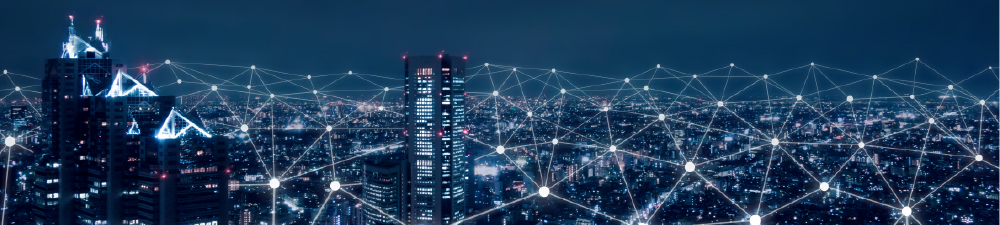

# Mini Project 3  - IU 4.6 Machine Learning

## Packages and setup

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

# Parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [2]:
# Edit the file location of raw data set

# Read file to variable 'cust_df'
cust_df=pd.read_csv("Mini project 3 Data.csv")

cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Exercise

## Placeholder for your analysis

In [3]:
# Change 'Unknown' to Nan for all records except 'Homeownership' field

# Create temp df with all fields except 'Homeownership'
cust_df_temp = cust_df.loc[:, cust_df.columns != "Homeownership"]

# Change 'Unknown' to Nan for all records in temp df
cust_df_temp.replace('Unknown',np.nan, inplace = True)

# Join temp df back with 'Homeownership' with same variable name cust_df
cust_df = pd.concat([cust_df_temp,cust_df.Homeownership], axis=1)

cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Homeownership
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,Known
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,Known
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,6,No,0,NaN,No,3-Good,Town,Crafts,Yes,Unknown
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,6,No,0,10,No,4-Medium,Other,Other,No,Known
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,9,No,1,10,No,1-Highest,Other,Professional,Yes,Known


In [4]:
# Convert type for HandsetPrice from obj to float
cust_df['HandsetPrice'] = cust_df['HandsetPrice'].astype(float)

# Change 'NA' to Nan for all records
cust_df.replace('NA', np.nan, inplace= True)

cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Homeownership
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,4,No,0,30.0,Yes,1-Highest,Suburban,Professional,No,Known
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,5,No,0,30.0,No,4-Medium,Suburban,Professional,Yes,Known
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,6,No,0,NaN,No,3-Good,Town,Crafts,Yes,Unknown
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,6,No,0,10.0,No,4-Medium,Other,Other,No,Known
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,9,No,1,10.0,No,1-Highest,Other,Professional,Yes,Known


In [5]:
# Type your code here to explore and understand the data better

# Identify the dimension of cust_df, data types, nulls values etc
cust_df.shape
cust_df.describe()
cust_df.info()

(51047, 58)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
count,5.104700e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50680.000000,50680.000000,51047.000000,...,51046.000000,51046.000000,50138.000000,50138.000000,51047.000000,51047.000000,51047.000000,51047.000000,51047.000000,22065.000000
mean,3.201957e+06,58.834492,525.653416,46.830088,0.895229,40.027785,1.236244,-11.547908,-1.191985,6.011489,...,1.558751,380.545841,31.338127,21.144142,0.037201,0.018277,0.052070,4.324524,0.053911,82.237933
std,1.169056e+05,44.507336,529.871063,23.848871,2.228546,96.588076,9.818294,257.514772,39.574915,9.043955,...,0.905932,253.801982,22.094635,23.931368,0.206483,0.142458,0.307592,3.138236,0.383147,60.401984
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,-3875.000000,-1107.700000,0.000000,...,1.000000,-5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,3.100632e+06,33.610000,158.000000,30.000000,0.000000,0.000000,0.000000,-83.000000,-7.100000,0.700000,...,1.000000,205.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000
50%,3.201534e+06,48.460000,366.000000,45.000000,0.250000,3.000000,0.000000,-5.000000,-0.300000,3.000000,...,1.000000,329.000000,36.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,60.000000
75%,3.305376e+06,71.065000,723.000000,60.000000,0.990000,41.000000,0.300000,66.000000,1.600000,7.700000,...,2.000000,515.000000,48.000000,42.000000,0.000000,0.000000,0.000000,7.000000,0.000000,130.000000
max,3.399994e+06,1223.380000,7359.000000,400.000000,159.390000,4321.000000,1112.400000,5192.000000,2483.500000,221.700000,...,15.000000,1812.000000,99.000000,99.000000,4.000000,3.000000,35.000000,9.000000,25.000000,500.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [6]:
# How many customers had zero monthly revenue?
cust_df[cust_df['MonthlyRevenue'] == 0][['CustomerID']].count()
# Learners' answer: 6 customers has zero monthly revenue

# Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df = cust_df[cust_df['MonthlyRevenue'] != 0]
cust_df.head()
cust_df.shape

CustomerID    6
dtype: int64

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Homeownership
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,4,No,0,30.0,Yes,1-Highest,Suburban,Professional,No,Known
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,5,No,0,30.0,No,4-Medium,Suburban,Professional,Yes,Known
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,6,No,0,NaN,No,3-Good,Town,Crafts,Yes,Unknown
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,6,No,0,10.0,No,4-Medium,Other,Other,No,Known
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,9,No,1,10.0,No,1-Highest,Other,Professional,Yes,Known


(51041, 58)

### Q1.2 How many columns has missing values percentage > 5%

In [7]:
# Calculate for each column % of missing value in the data
pd.DataFrame(((cust_df.isnull().sum())/cust_df['CustomerID'].count()*100), index=cust_df.columns, columns=['missing value']).sort_values('missing value', ascending = False).head()

# How many columns has missing values percentage > 5%
((cust_df.isnull().sum())/cust_df.count()*100 > 5).value_counts()
# Learners' answer: 2 columns has missing values percentage > 5% (HandsetPrice, MaritalStatus)

,missing value
HandsetPrice,56.775925
MaritalStatus,38.588586
AgeHH2,1.780921
AgeHH1,1.780921
PercChangeMinutes,0.715111


False    56
True      2
dtype: int64

In [8]:
# What strategy should be used for imputation?
# Learners' answer: Drop columns with missing values percentage > 5% (HandsetPrice, MaritalStatus) and exclude rows with null values as the percentage of the missing values in each remaining field is <2%.
cust_df = cust_df.drop(['HandsetPrice', 'MaritalStatus'], axis = 1)
cust_df = cust_df.dropna()
cust_df.shape
cust_df.head()

(49748, 56)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,Homeownership
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,No,0,4,No,0,Yes,1-Highest,Suburban,Professional,Known
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,No,0,5,No,0,No,4-Medium,Suburban,Professional,Known
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,No,0,6,No,0,No,3-Good,Town,Crafts,Unknown
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,No,0,6,No,0,No,4-Medium,Other,Other,Known
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,Yes,0,9,No,1,No,1-Highest,Other,Professional,Known


<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)
    
    2 columns has missing values percentage > 5% (HandsetPrice, MaritalStatus)
    
    Strategy: Drop columns with missing values percentage > 5% (HandsetPrice, MaritalStatus)
    
    And to exclude rows with null values as the percentage of the missing values in each remaining field is <2%.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

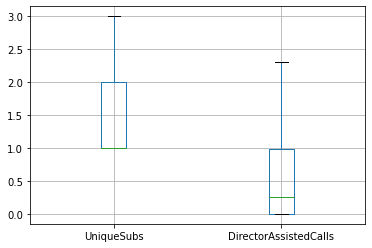

In [9]:
# Plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cust_df[['UniqueSubs', 'DirectorAssistedCalls']].boxplot(sym='');

<AxesSubplot:>

(49066, 56)

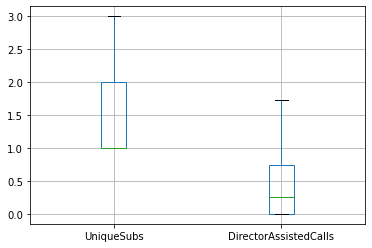

In [10]:
# Remove top 1% outliers from the above mentioned two columns and plot the box plot again
# Use "quantile" function to identify top 1% outliers

US = np.percentile(cust_df['UniqueSubs'],99)
DAC = np.percentile(cust_df['DirectorAssistedCalls'],99)

cust_df = cust_df[(cust_df['UniqueSubs'] <= US) & (cust_df['DirectorAssistedCalls'] <= DAC)]
cust_df[['UniqueSubs', 'DirectorAssistedCalls']].boxplot(sym='');
cust_df.shape

In [11]:
# Create df with just numerical fields, add in 'Churn' field as target
cust_num = cust_df.select_dtypes(exclude=['object', 'category'])
cust_num['Churn'] = cust_df['Churn']
cust_num.shape
cust_num.head()

(49066, 36)

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,Churn
0,3000002,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,...,2.0,361.0,62.0,0.0,1,0,0,4,0,Yes
1,3000010,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,...,1.0,1504.0,40.0,42.0,0,0,0,5,0,Yes
2,3000014,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,...,1.0,1812.0,26.0,26.0,0,0,0,6,0,No
3,3000022,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,...,4.0,458.0,30.0,0.0,0,0,0,6,0,No
4,3000026,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,...,3.0,852.0,46.0,54.0,0,0,0,9,1,Yes


In [12]:
# Create df with non numerical fields, add in 'CustomerID' as identifier
cust_obj = cust_df.select_dtypes(exclude=np.number)
cust_obj['CustomerID'] = cust_df['CustomerID']
cust_obj.shape
cust_obj.head()

(49066, 22)

,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,...,HasCreditCard,NewCellphoneUser,NotNewCellphoneUser,OwnsMotorcycle,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,Homeownership,CustomerID
0,Yes,SEAPOR503,No,No,Yes,No,No,Yes,Yes,No,...,Yes,No,No,No,Yes,1-Highest,Suburban,Professional,Known,3000002
1,Yes,PITHOM412,Yes,No,No,No,No,Yes,Yes,No,...,Yes,Yes,No,No,No,4-Medium,Suburban,Professional,Known,3000010
2,No,MILMIL414,Yes,No,No,No,No,No,No,No,...,Yes,Yes,No,No,No,3-Good,Town,Crafts,Unknown,3000014
3,No,PITHOM412,No,No,Yes,No,No,Yes,Yes,No,...,Yes,Yes,No,No,No,4-Medium,Other,Other,Known,3000022
4,Yes,OKCTUL918,No,No,No,No,No,Yes,Yes,No,...,Yes,No,Yes,No,No,1-Highest,Other,Professional,Known,3000026


## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

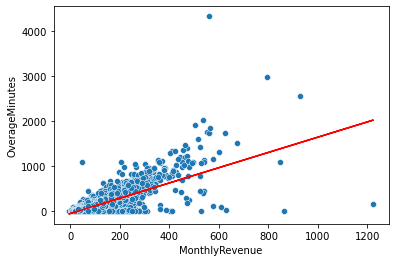

In [13]:
# Use scatter plot to find the correlation between monthly revenue and overage minutes
from scipy.stats import linregress
sns.scatterplot(x = 'MonthlyRevenue', y = 'OverageMinutes', data = cust_df);

# Add slope
slope, intercept, r_value, p_value, std_err = linregress(cust_df['MonthlyRevenue'],cust_df['OverageMinutes']);
plt.plot(cust_df['MonthlyRevenue'],slope*cust_df['MonthlyRevenue']+intercept,'r');

In [14]:
# Calculate Peasons correlation coefficient
stats.pearsonr(cust_df['MonthlyRevenue'], cust_df['OverageMinutes'])

(0.7830341461762276, 0.0)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis
    
    Based on Pearsons, correlation is 0.783.
    
    As such, there is a strong positive correlation relationship between the two variables.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

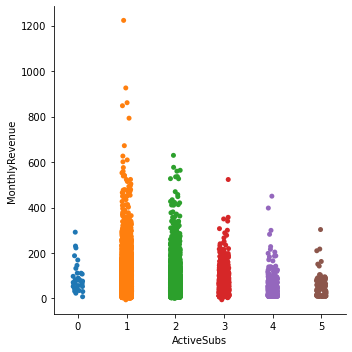

In [15]:
# Use category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs',y='MonthlyRevenue',data=cust_df);

<mark>__Result:__
    
    The graph shows a decreasing trend.
    
    The more active subcriptions a customer has, the lower the monthly revenue.

### Q2.3 Does credit rating have an impact in churn rate?

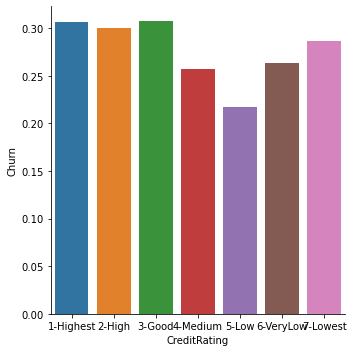

In [16]:
# Change 'CreditRating' field type to category
cust_df['CreditRating']=cust_df['CreditRating'].astype('category')

# Rearrange category order
cust_df['CreditRating'].cat.reorder_categories(
  new_categories=['1-Highest', '2-High', '3-Good', '4-Medium', '5-Low', '6-VeryLow','7-Lowest'],
  ordered=True,
  inplace=True)

# Replace 'Churn' field from 'Yes' / 'No' to 1 / 0 for both cust_df and cust_num
cust_df['Churn']=cust_df['Churn'].replace({'Yes':1,'No':0})
cust_num['Churn']=cust_num['Churn'].replace({'Yes':1,'No':0})

# Change 'Churn' field type to float
cust_df['Churn']=cust_df['Churn'].astype(float)
cust_num['Churn']=cust_num['Churn'].astype(float)

# Plot bar plot see relationship of credit rating vs churn rate
sns.catplot(x='CreditRating',y='Churn',data=cust_df[['CreditRating','Churn']],kind='bar',ci=None);

<mark>__Result:__
    
    The impact of credit rating on churn rate is minimal as the mean of the churn rate is in the range of 25%-30% regardless of the credit rating category the customer is in.

### Placeholder for additional exploratory analysis

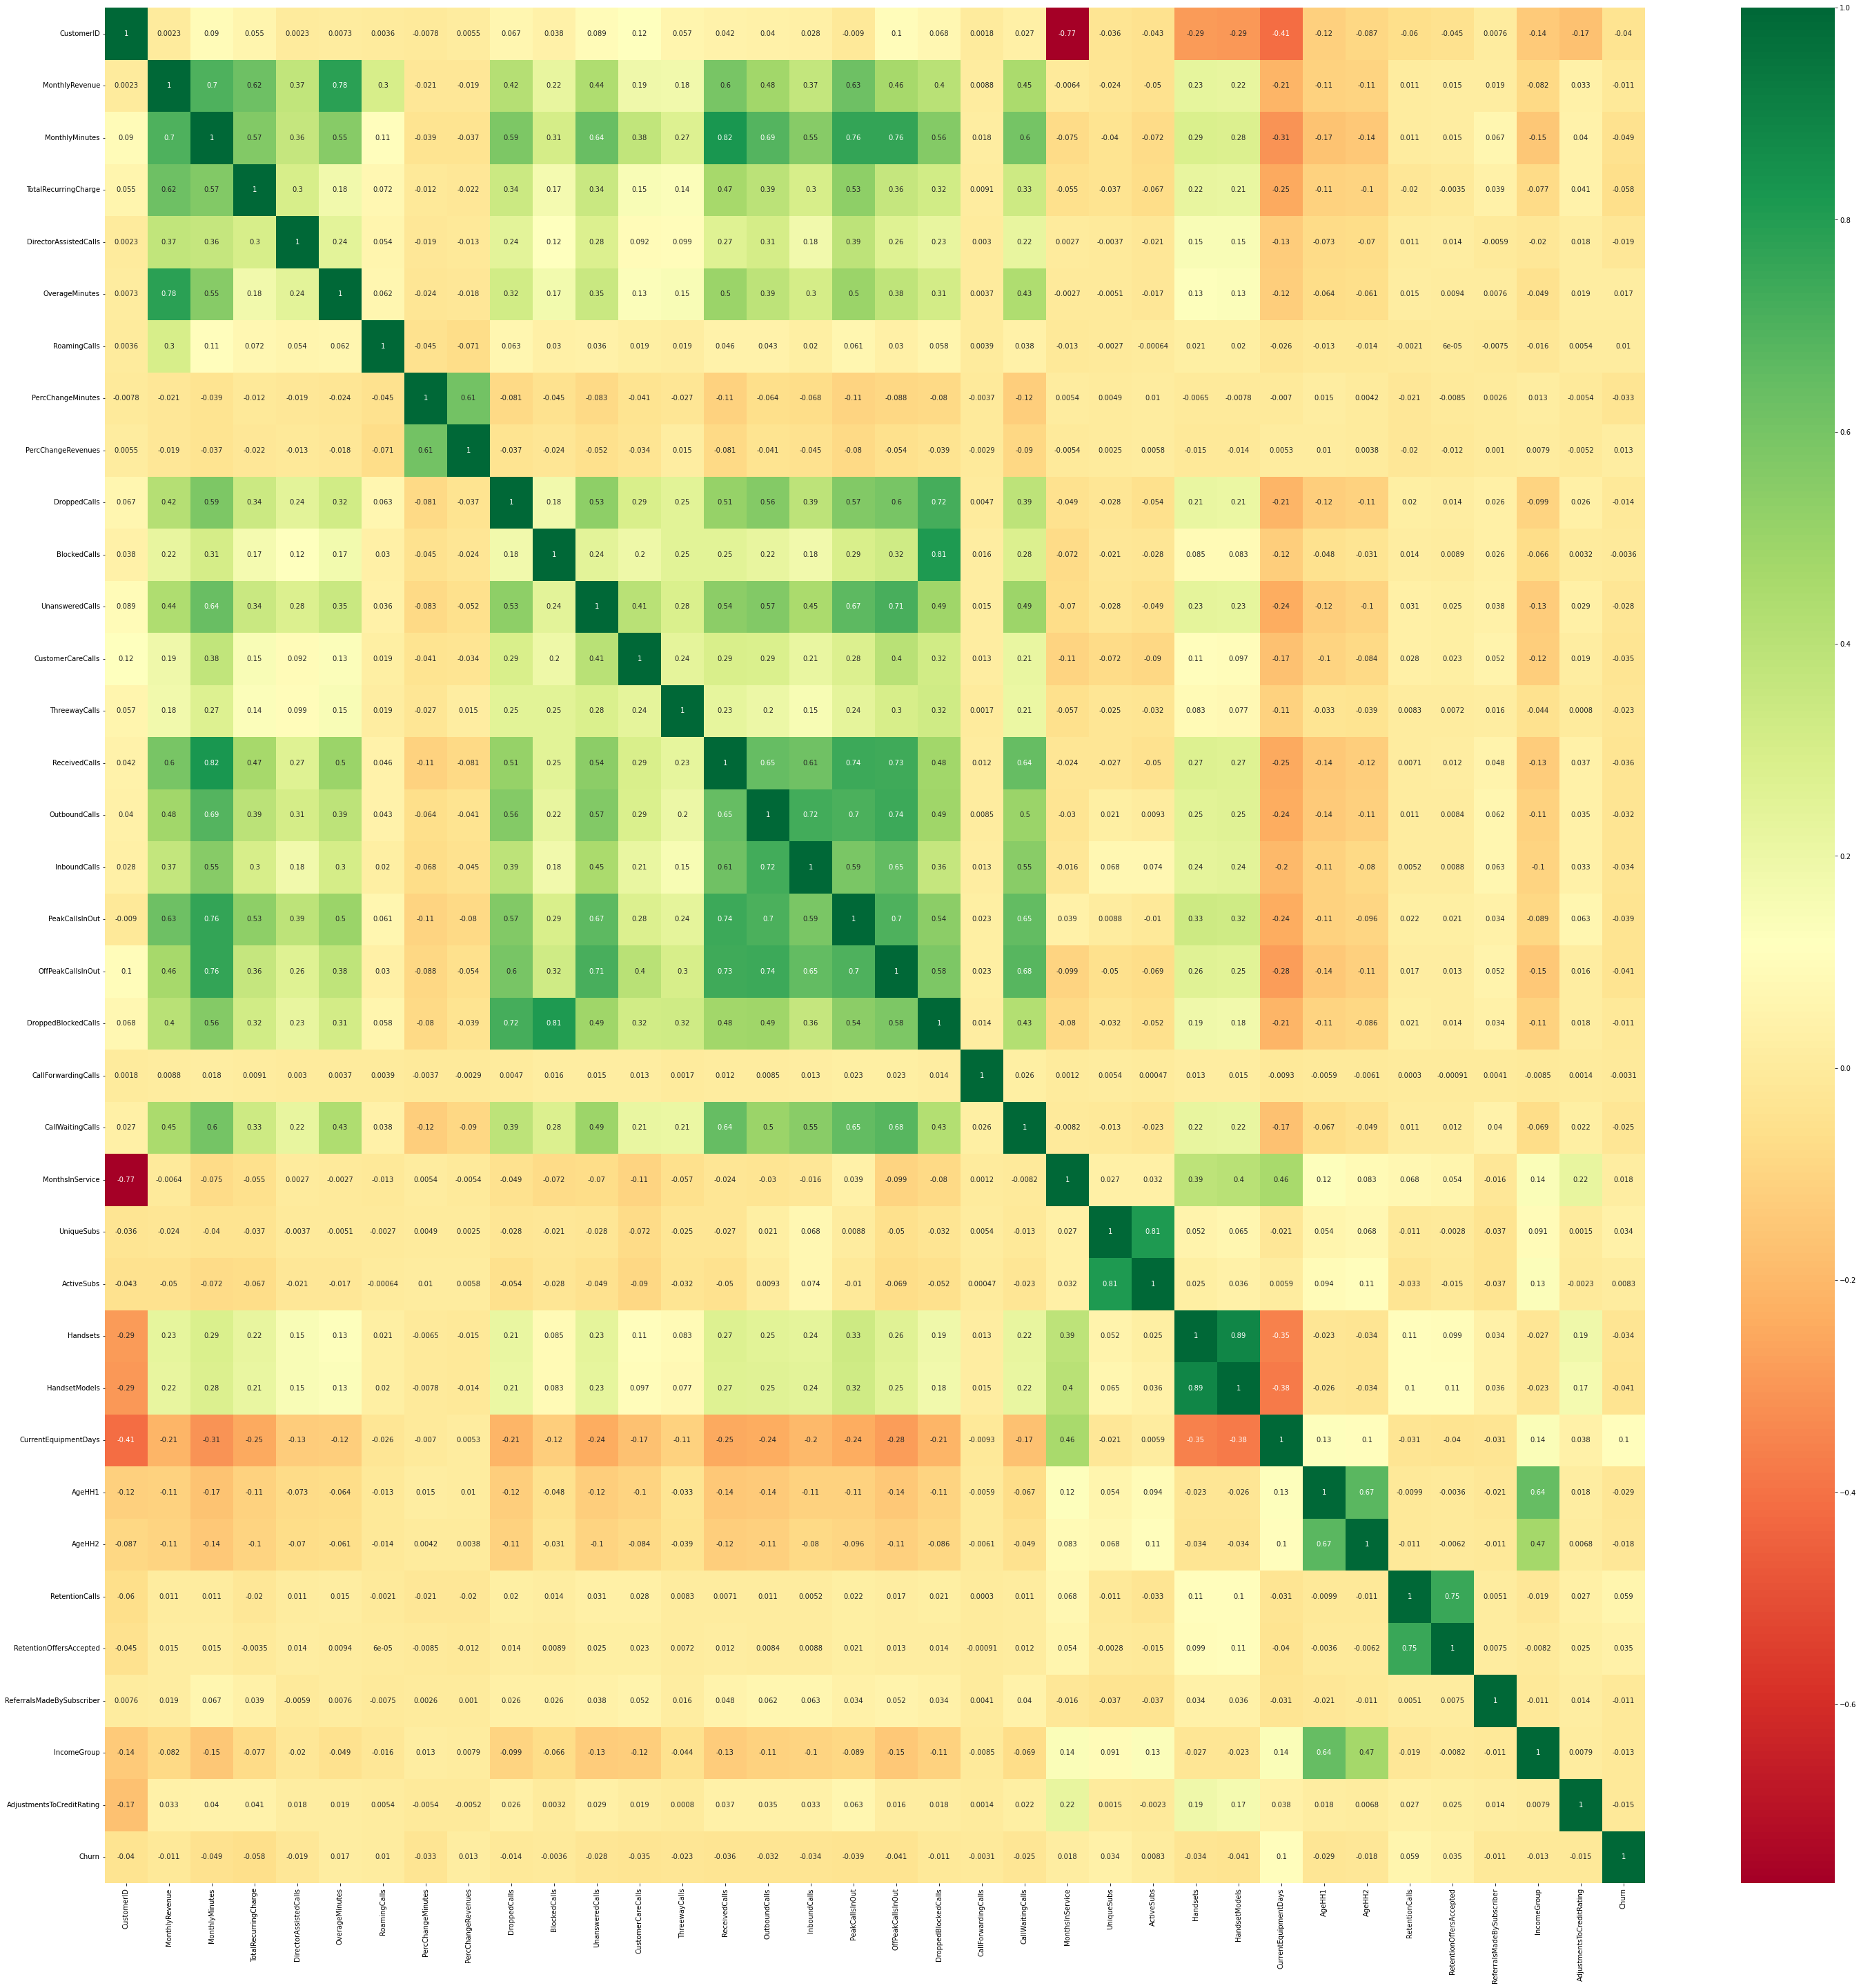

In [17]:
# Type your code here for any additional exploratory analysis (if any)

# Plot heatmap to see correlation between each variables
cor_matrix = cust_num.corr();
plt.figure(figsize = (50,50));
sns.heatmap(cor_matrix, cmap='RdYlGn', annot=True);

In [18]:
# Find out 10 important features for numerical fields

from sklearn.ensemble import RandomForestClassifier;

X = cust_num.drop(['Churn','CustomerID'], axis = 1);
y = cust_num.Churn;

model = RandomForestClassifier();
model.fit(X,y);

model.feature_importances_;

feature_importance = pd.Series(model.feature_importances_, index = X.columns);

In [19]:
feature_importance.nlargest(10)

CurrentEquipmentDays    0.068823
PercChangeMinutes       0.059753
MonthlyMinutes          0.058421
MonthlyRevenue          0.052726
PercChangeRevenues      0.052249
MonthsInService         0.049930
PeakCallsInOut          0.045205
OffPeakCallsInOut       0.044424
ReceivedCalls           0.043527
UnansweredCalls         0.043230
dtype: float64

In [20]:
# Label encoded some categorical variables that may contain information in their ordering set
# Import LabelEncoder package
from sklearn.preprocessing import LabelEncoder

# List of columns that need label encoding (categorical columns)
cols= ['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'BuysViaMailOrder',
       'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer',
       'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'OwnsMotorcycle', 'MadeCallToRetentionTeam', 'CreditRating',
       'PrizmCode', 'Occupation', 'CustomerID','Homeownership'];

# Process columns, apply LabelEncoder to categories features

# Create a for loop to iterate across all columns
for c in cols:
    
    # Create a LabelEncoder object lbl
    lbl=LabelEncoder();
    lbl.fit(list(cust_obj[c].values));
    cust_obj[c]=lbl.transform(list(cust_obj[c].values));

print('Shape all_data: {}'.format(cust_obj.shape))

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

LabelEncoder()

Shape all_data: (49066, 22)


In [21]:
# Find out 10 important features for non numerical fields
X1 = cust_obj.drop(['Churn','CustomerID'], axis = 1);
y1 = cust_obj.Churn;

model = RandomForestClassifier();
model.fit(X1,y1);

model.feature_importances_;

feature_importance = pd.Series(model.feature_importances_, index = X1.columns);

In [22]:
feature_importance.nlargest(10)

ServiceArea            0.606252
CreditRating           0.075989
Occupation             0.064073
PrizmCode              0.058649
NewCellphoneUser       0.020580
OwnsComputer           0.020455
NotNewCellphoneUser    0.019458
TruckOwner             0.018279
ChildrenInHH           0.017904
HandsetRefurbished     0.012951
dtype: float64

## Q3. Create additional features to help predict churn

In [23]:
# Wrapper function to create additional features for churn prediction

def create_features(cust_df):
    
    # 3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    # 3.2 Percent of recurrent charge to monthly charge
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    # 3.3 Percent of overage minutes over total monthly minutes
    cust_df['perc_overage_minutes']= cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    # 3.4 Percent of dropped blocked calls over blocked calls
    cust_df['perc_dropped_blocked_calls'] = cust_df['DroppedBlockedCalls']/cust_df['BlockedCalls']
    
    cust_df = cust_df.replace([np.inf, -np.inf], np.nan)
    cust_df = cust_df.dropna()
    
    return cust_df

In [24]:
# Make a call to the feature engineering wrapper function for churn prediction
cust_df_predict = create_features(cust_df)
cust_df_predict = cust_df_predict.reset_index()
cust_df_predict.shape
cust_df_predict.head()

(35670, 61)

,index,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,...,AdjustmentsToCreditRating,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,Homeownership,perc_active_subs,perc_recurrent_charge,perc_overage_minutes,perc_dropped_blocked_calls
0,0,3000002,1.0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,...,0,Yes,1-Highest,Suburban,Professional,Known,0.5,0.916667,0.0,1.857143
1,3,3000022,0.0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,...,0,No,4-Medium,Other,Other,Known,1.0,0.911522,0.0,7.753247
2,5,3000030,0.0,38.05,682.0,52.0,0.25,0.0,0.0,148.0,...,1,No,3-Good,Other,Other,Known,1.0,1.366623,0.0,6.294118
3,6,3000038,0.0,31.66,26.0,30.0,0.25,0.0,0.0,60.0,...,1,No,1-Highest,Other,Self,Known,1.0,0.947568,0.0,1.000000
4,7,3000042,0.0,62.13,98.0,66.0,2.48,0.0,0.0,24.0,...,0,No,1-Highest,Other,Professional,Known,1.0,1.062289,0.0,1.000000


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [25]:
# Take the first 3 code of ServiceArea to form a new field - Area
cust_df_predict_area = cust_df_predict['ServiceArea'].str[:3]
cust_df_predict_area.head()

0    SEA
1    PIT
2    OKC
3    OKC
4    OKC
Name: ServiceArea, dtype: object

In [26]:
# Create dummies code for Area
Area = pd.get_dummies(cust_df_predict_area) 
Area.columns

Index(['AIR', 'APC', 'ATH', 'ATL', 'AWI', 'BIR', 'BOS', 'CHI', 'DAL', 'DEN',
       'DET', 'FLN', 'GCW', 'HAR', 'HOU', 'HWI', 'IND', 'INH', 'INU', 'IPM',
       'KCY', 'LAU', 'LAW', 'LAX', 'LOU', 'MIA', 'MIL', 'MIN', 'NCR', 'NEV',
       'NMC', 'NMX', 'NNY', 'NOL', 'NOR', 'NSH', 'NVU', 'NYC', 'OHH', 'OHI',
       'OKC', 'OMA', 'PHI', 'PHX', 'PIT', 'SAN', 'SDA', 'SEA', 'SEW', 'SFR',
       'SFU', 'SHE', 'SLC', 'SLU', 'STL', 'VAH'],
      dtype='object')

In [27]:
# Train - test - split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler          

cust_df_scaled = StandardScaler().fit_transform(cust_df_predict[['perc_active_subs','perc_recurrent_charge','perc_recurrent_charge','RetentionCalls','CurrentEquipmentDays','perc_dropped_blocked_calls']]) 
cust_df_scaled = pd.DataFrame(cust_df_scaled, columns=['perc_active_subs','perc_recurrent_charge','perc_recurrent_charge','RetentionCalls','CurrentEquipmentDays','perc_dropped_blocked_calls'])
cust_df_scaled = pd.concat([cust_df_scaled,Area], axis=1)
cust_df_scaled.head()

,perc_active_subs,perc_recurrent_charge,perc_recurrent_charge,RetentionCalls,CurrentEquipmentDays,perc_dropped_blocked_calls,AIR,APC,ATH,ATL,...,SDA,SEA,SEW,SFR,SFU,SHE,SLC,SLU,STL,VAH
0,-2.634563,0.116461,0.116461,4.713597,-0.012483,-0.471349,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0.374295,0.098523,0.098523,-0.177716,0.381871,0.183865,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.374295,1.685279,1.685279,-0.177716,-0.540999,0.021717,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.374295,0.224202,0.224202,-0.177716,0.963238,-0.566601,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.374295,0.624188,0.624188,-0.177716,0.406264,-0.566601,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# Define columns to be included in X and y
X = cust_df_scaled.values
y = cust_df_predict['Churn'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0,stratify=y)

In [29]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

skfold = StratifiedKFold(n_splits=10)
model = LogisticRegression()
results = cross_val_score(model, X, y, cv = skfold)
print(results)
print(np.mean(results))

[0.71684889 0.71404542 0.71712924 0.71825063 0.71712924 0.71797028
 0.71768994 0.71965237 0.71853098 0.71292403]
0.7170171012054948


### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [30]:
#-------------------------------- Model training -------------------------------#

# Type your code to build logistic regression model on training data set

# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
Lr = LogisticRegression()

# Fit the classifier
Lr.fit(X_train, y_train)

LogisticRegression()

0.7169690416115984

0.7174095878889823

[[7638   50]
 [2974   39]]
0.43820224719101125
0.01294390972452705


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

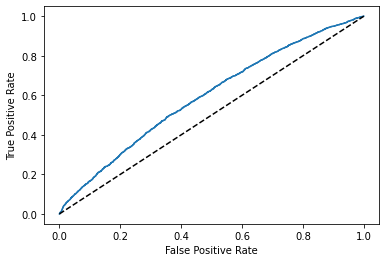

0.5935277256757312
0.02514506769825919


In [31]:
#-------------------------------- Model testing ---------------------------------#

# Type your code here to predict for X_test data set using the fitted model
# Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

# Predict the label of new_customer using default
y_pred=Lr.predict(X_test)

# Score the model
Lr.score(X_train,y_train)

# Score the model with test set
Lr.score(X_test,y_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test,y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

# Generate the probabilities
y_pred_prob = Lr.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

# f1score = 2 * (precision * recall) / (precision + recall) to account for trade off between precision and sensitivity
# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [32]:
#-------------------------------- Model training -------------------------------#

# Type your code to build random forest classifier model on training data set

# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Instantiate the classifier
clf = RandomForestClassifier()

# Fit to the training data
clf.fit(X_train,y_train)

# Compute accuracy
print(clf.score(X_train, y_train))

RandomForestClassifier()

0.9999599503384197


0.9999599503384197

0.6944210821418559

[[7061  627]
 [2643  370]]
0.3711133400200602
0.12280119482243611


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

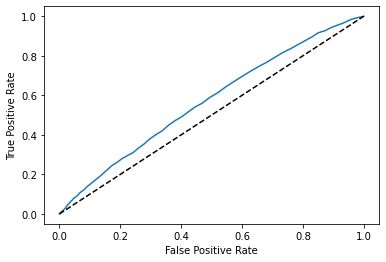

0.5696494085808531
0.1845386533665835


In [33]:
#-------------------------------- Model testing ---------------------------------#

# Type your code here to predict for X_test data set using the fitted RF model

# Predict the label of new_customer using default
y_pred=clf.predict(X_test)

# Score the model
clf.score(X_train,y_train)

# Score the model with test set
clf.score(X_test,y_test)

# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Print confusion matrix
print(confusion_matrix(y_test,y_pred))

# Import precision_score
from sklearn.metrics import precision_score

# Print the precision
print(precision_score(y_test,y_pred))

# Import recall_score
from sklearn.metrics import recall_score

# Print the recall
print(recall_score(y_test, y_pred))

# Generate the probabilities
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Import roc_curve
from sklearn.metrics import roc_curve

# Calculate the roc metrics
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr,tpr)

# Add labels and diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.plot([0, 1], [0, 1], "k--")
plt.show()

# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Print the AUC
print(roc_auc_score(y_test,y_pred_prob))

# f1score = 2 * (precision * recall) / (precision + recall) to account for trade off between precision and sensitivity

# Import f1_score
from sklearn.metrics import f1_score

# Print the F1 score
print(f1_score(y_test,y_pred))

<mark>__Result:__
    
    Log regressions has better accuracy with the following metrics:
    - perc_active_subs
    - perc_recurrent_charge
    - perc_recurrent_charge
    - RetentionCalls
    - CurrentEquipmentDays
    - perc_dropped_blocked_calls
    - ServiceArea    

### Q4.3 Identify most important features impacting churn

In [34]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created
importances = pd.DataFrame(clf.feature_importances_,
                           index=cust_df_scaled.columns,
                           columns=['importance']);
importances.sort_values('importance', ascending=False, inplace=True);

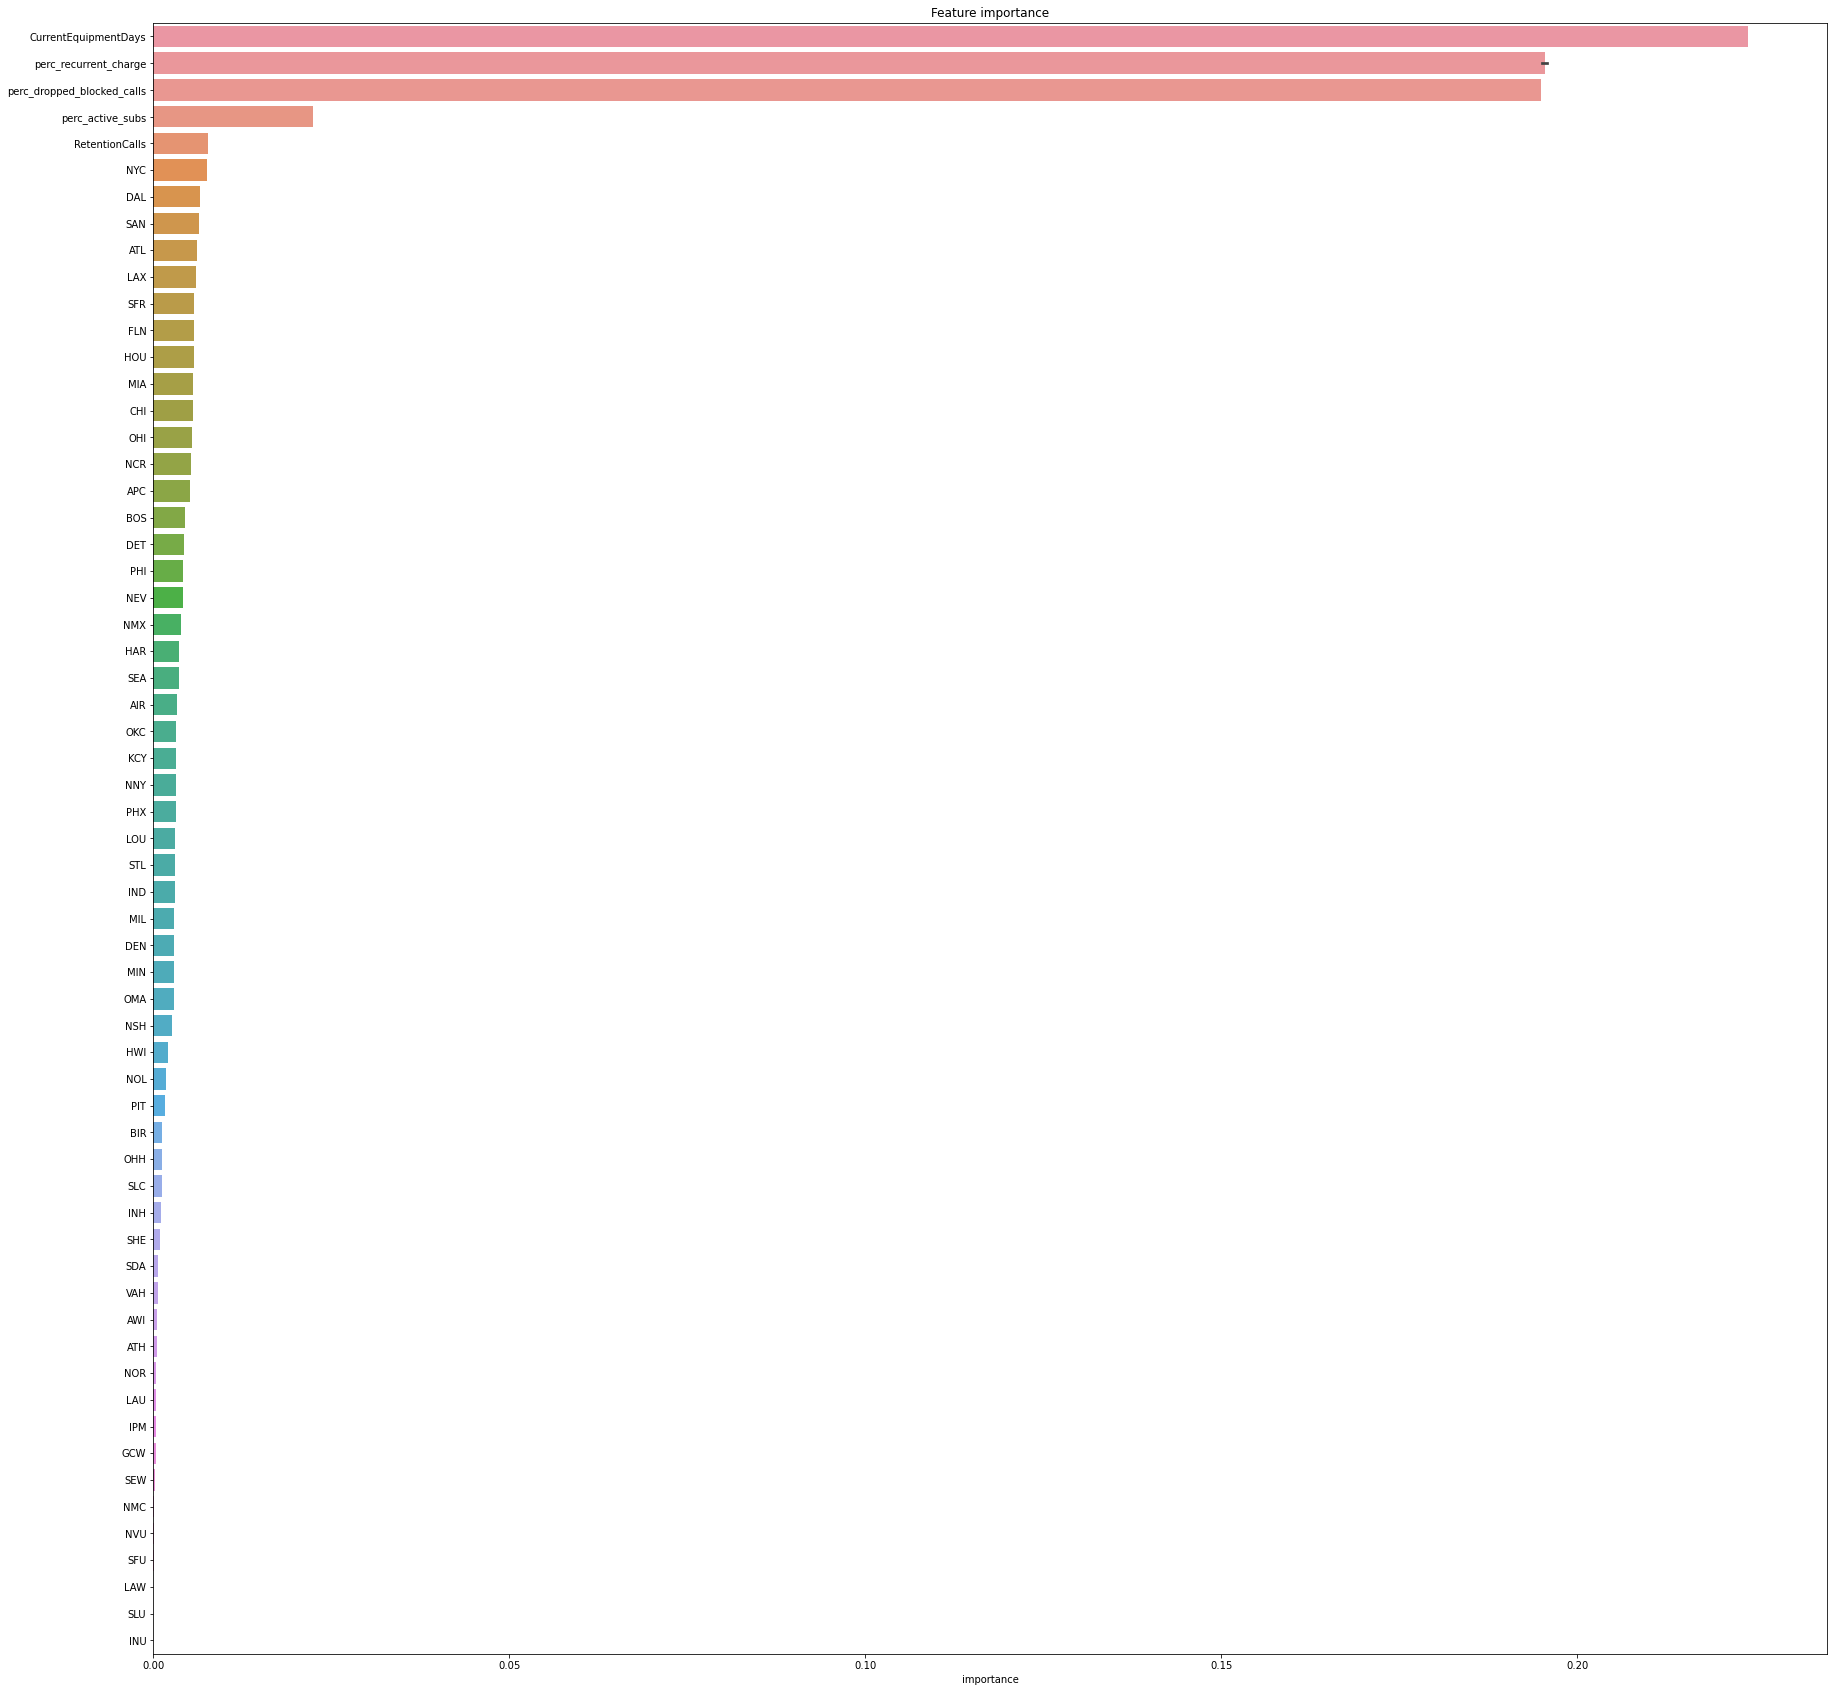

In [35]:
# Plot feature importance
plt.figure(figsize=(30, 30))
sns.barplot(data=importances, y=importances.index, x='importance')
plt.title('Feature importance');

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [36]:
# Type your code here to predict churners based on the hold out data set provided
# Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
# Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4
# Use "predict" function on the transformend data using the best fitted model object

In [37]:
holdout = pd.read_csv('Mini project 3 Hold Out Data.csv')
holdout.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,0,5,No,1,150,No,5-Low,Other,Other,No
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,0,6,No,2,80,No,1-Highest,Other,Professional,No
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,0,4,No,3,10,No,3-Good,Suburban,Crafts,Yes
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,0,4,No,1,200,No,1-Highest,Other,Other,No
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,0,3,No,0,10,No,1-Highest,Suburban,Other,No


In [38]:
holdout_temp = holdout.loc[:, holdout.columns != "Homeownership"]
holdout_temp.replace('Unknown',np.nan, inplace = True)
holdout = pd.concat([holdout_temp,holdout.Homeownership], axis=1)
holdout.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Homeownership
0,3000006,NaN,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,...,5,No,1,150,No,5-Low,Other,Other,No,Unknown
1,3000018,NaN,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,...,6,No,2,80,No,1-Highest,Other,Professional,No,Known
2,3000034,NaN,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,...,4,No,3,10,No,3-Good,Suburban,Crafts,Yes,Unknown
3,3000070,NaN,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,...,4,No,1,200,No,1-Highest,Other,Other,No,Known
4,3000074,NaN,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,...,3,No,0,10,No,1-Highest,Suburban,Other,No,Known


In [39]:
holdout.isnull().sum().sort_values(ascending = False).head(10)

Churn                    20000
HandsetPrice             11267
MaritalStatus             7640
AgeHH1                     335
AgeHH2                     335
PercChangeRevenues         135
PercChangeMinutes          135
RoamingCalls                60
OverageMinutes              60
DirectorAssistedCalls       60
dtype: int64

In [40]:
holdout['HandsetPrice'] = holdout['HandsetPrice'].astype(float)
holdout = holdout.drop(['Churn'],axis=1)
holdout.replace('NA', np.nan, inplace= True)
holdout.head()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Homeownership
0,3000006,57.49,483.0,37.0,0.25,23.0,0.0,532.0,51.0,8.3,...,5,No,1,150.0,No,5-Low,Other,Other,No,Unknown
1,3000018,55.23,570.0,72.0,0.00,0.0,0.0,38.0,0.0,9.7,...,6,No,2,80.0,No,1-Highest,Other,Professional,No,Known
2,3000034,97.34,1039.0,50.0,4.95,420.0,0.0,198.0,23.3,12.7,...,4,No,3,10.0,No,3-Good,Suburban,Crafts,Yes,Unknown
3,3000070,35.59,153.0,30.0,0.00,16.0,0.0,30.0,7.3,2.0,...,4,No,1,200.0,No,1-Highest,Other,Other,No,Known
4,3000074,55.27,1213.0,50.0,0.74,0.0,1.3,169.0,1.0,2.7,...,3,No,0,10.0,No,1-Highest,Suburban,Other,No,Known


In [41]:
# Drop columns HandsetPrice, MaritalStatus
holdout = holdout.drop(['HandsetPrice', 'MaritalStatus'], axis = 1)
holdout = holdout.dropna()

# Create df with just numerical fields
holdout_num = holdout.select_dtypes(exclude=['object', 'category'])
holdout_num.shape

# Create df with non numerical fields, add in 'CustomerID' as identifier
holdout_obj = holdout.select_dtypes(exclude=np.number)
holdout_obj['CustomerID'] = holdout['CustomerID']
holdout_obj.shape

(19529, 35)

(19529, 21)

In [42]:
# Make a call to the feature engineering wrapper function for churn prediction
holdout_predict = create_features(holdout)
holdout_predict = holdout_predict.reset_index()

# Take the first 3 code of ServiceArea to form a new field - Area
holdout_predict_area = holdout_predict['ServiceArea'].str[:3]

In [43]:
# Create dummies code for Area
holdoutArea = pd.get_dummies(holdout_predict_area)

# Check and match train fields with holdout fields
display(Area.columns)
display(holdoutArea.columns)

# Add missing fields to holdout set
holdoutArea[['LAW','SLU']] = 0
holdoutArea.head()

Index(['AIR', 'APC', 'ATH', 'ATL', 'AWI', 'BIR', 'BOS', 'CHI', 'DAL', 'DEN',
       'DET', 'FLN', 'GCW', 'HAR', 'HOU', 'HWI', 'IND', 'INH', 'INU', 'IPM',
       'KCY', 'LAU', 'LAW', 'LAX', 'LOU', 'MIA', 'MIL', 'MIN', 'NCR', 'NEV',
       'NMC', 'NMX', 'NNY', 'NOL', 'NOR', 'NSH', 'NVU', 'NYC', 'OHH', 'OHI',
       'OKC', 'OMA', 'PHI', 'PHX', 'PIT', 'SAN', 'SDA', 'SEA', 'SEW', 'SFR',
       'SFU', 'SHE', 'SLC', 'SLU', 'STL', 'VAH'],
      dtype='object')

Index(['AIR', 'APC', 'ATH', 'ATL', 'AWI', 'BIR', 'BOS', 'CHI', 'DAL', 'DEN',
       'DET', 'FLN', 'GCW', 'HAR', 'HOU', 'HWI', 'IND', 'INH', 'INU', 'IPM',
       'KCY', 'LAU', 'LAX', 'LOU', 'MIA', 'MIL', 'MIN', 'NCR', 'NEV', 'NMC',
       'NMX', 'NNY', 'NOL', 'NOR', 'NSH', 'NVU', 'NYC', 'OHH', 'OHI', 'OKC',
       'OMA', 'PHI', 'PHX', 'PIT', 'SAN', 'SDA', 'SEA', 'SEW', 'SFR', 'SFU',
       'SHE', 'SLC', 'STL', 'VAH'],
      dtype='object')

,AIR,APC,ATH,ATL,AWI,BIR,BOS,CHI,DAL,DEN,...,SEA,SEW,SFR,SFU,SHE,SLC,STL,VAH,LAW,SLU
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
holdout_scaled = StandardScaler().fit_transform(holdout_predict[['perc_active_subs','perc_recurrent_charge','perc_recurrent_charge','RetentionCalls','CurrentEquipmentDays','perc_dropped_blocked_calls']]) 
holdout_scaled = pd.DataFrame(holdout_scaled, columns=['perc_active_subs','perc_recurrent_charge','perc_recurrent_charge','RetentionCalls','CurrentEquipmentDays','perc_dropped_blocked_calls'])
holdout_scaled = pd.concat([holdout_scaled,holdoutArea], axis=1)
holdout_scaled.head()

,perc_active_subs,perc_recurrent_charge,perc_recurrent_charge,RetentionCalls,CurrentEquipmentDays,perc_dropped_blocked_calls,AIR,APC,ATH,ATL,...,SEA,SEW,SFR,SFU,SHE,SLC,STL,VAH,LAW,SLU
0,0.379222,-0.821846,-0.821846,-0.176023,-0.491250,0.338548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.379222,1.473238,1.473238,-0.176023,0.298659,0.920418,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.379222,-1.273620,-1.273620,-0.176023,1.381730,-0.098494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.579442,-0.128702,-0.128702,-0.176023,-1.273015,-0.246393,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.379222,0.085895,0.085895,-0.176023,0.192795,-0.505087,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
holdout_y_pred=Lr.predict(holdout_scaled.to_numpy())
pd.DataFrame(holdout_y_pred, columns=['Churn_pred'])

,Churn_pred
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
14169,0.0
14170,0.0
14171,0.0
14172,0.0


In [46]:
holdout_result = pd.concat([holdout_scaled,pd.DataFrame(holdout_y_pred, columns=['Churn_pred'])], axis=1)
holdout_result.head()

,perc_active_subs,perc_recurrent_charge,perc_recurrent_charge,RetentionCalls,CurrentEquipmentDays,perc_dropped_blocked_calls,AIR,APC,ATH,ATL,...,SEW,SFR,SFU,SHE,SLC,STL,VAH,LAW,SLU,Churn_pred
0,0.379222,-0.821846,-0.821846,-0.176023,-0.491250,0.338548,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0.379222,1.473238,1.473238,-0.176023,0.298659,0.920418,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0.379222,-1.273620,-1.273620,-0.176023,1.381730,-0.098494,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,-1.579442,-0.128702,-0.128702,-0.176023,-1.273015,-0.246393,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
4,0.379222,0.085895,0.085895,-0.176023,0.192795,-0.505087,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

In [47]:
# Type your code here to plot the lift chart from the best model
# Identify the lift i.e. 3x of capturing churn with and without using the model 
# (Assume: only top 20% high risk customers are to be targetted)

holdout_y_pred=Lr.predict_proba(holdout_scaled.to_numpy())
holdout_y_pred=pd.DataFrame(holdout_y_pred, columns=['P','1-P'])
holdout_y_pred = pd.concat([holdout_y_pred,holdout_predict[['CustomerID','MonthlyRevenue']]],axis=1)
top20churn = holdout_y_pred.sort_values('P',ascending = False).head(int(holdout_y_pred.shape[0]*.2))
top20churn

,P,1-P,CustomerID,MonthlyRevenue
8708,0.889163,0.110837,3240254,18.91
7921,0.887024,0.112976,3217930,10.62
5338,0.880032,0.119968,3148786,0.58
13288,0.866882,0.133118,3375138,57.73
12801,0.866235,0.133765,3363714,60.54
...,...,...,...,...
11237,0.786429,0.213571,3323030,37.58
3339,0.786420,0.213580,3093698,50.55
13964,0.786415,0.213585,3391778,84.92
444,0.786414,0.213586,3012518,51.94


In [48]:
top20churn.MonthlyRevenue.sum()

154246.27000000002

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability? 
    ### 78.64%


    
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers? 
    ### $154,246